# Part A:

In [1]:
#libraries
import numpy as np 
import pandas as pd
import cv2
import seaborn as sns
import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# visulization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Building the training data

In [2]:
# x = []
# y = []
# value = []
# for i in range(1000):
#     randX = random.randint(-10000, 10000)
#     randY = random.randint(-10000, 10000)
#     x.append(randX/100)
#     y.append(randY/100)
#     if y[i] > 1:
#         value.append(1)
#     else:
#         value.append(-1)

# end = {'x': x, 'y': y, 'value': value}
# df= pd.DataFrame(data=end,
#                 columns = ['x', 'y', 'value'])

In [3]:
# df.to_csv(r'C:\Users\talia\NeuroComputation\trainingDF.csv', index = False)

## Building the first test data

In [4]:
# x = []
# y = []
# value = []
# for i in range(1000):
#     randX = random.randint(-10000, 10000)
#     randY = random.randint(-10000, 10000)
#     x.append(randX/100)
#     y.append(randY/100)
#     if y[i] > 1:
#         value.append(1)
#     else:
#         value.append(-1)

# end = {'x': x, 'y': y, 'value': value}
# df= pd.DataFrame(data=end,
#                 columns = ['x', 'y', 'value'])

In [5]:
# df.to_csv(r'C:\Users\talia\NeuroComputation\firstTestDF.csv', index = False)

## Building the second test data

In [6]:
# x = []
# y = []
# value = []
# for i in range(1000):
#     randX = random.randint(-10000, 10000)
#     randY = random.randint(-10000, 10000)
#     x.append(randX/100)
#     y.append(randY/100)
#     if y[i] > 1:
#         value.append(1)
#     else:
#         value.append(-1)

# end = {'x': x, 'y': y, 'value': value}
# df= pd.DataFrame(data=end,
#                 columns = ['x', 'y', 'value'])

In [7]:
# df.to_csv(r'C:\Users\talia\NeuroComputation\secondTestDF.csv', index = False)

### DataFrames:

In [8]:
train = pd.read_csv(r'C:\Users\talia\NeuroComputation\trainingDF.csv')
first_test = pd.read_csv(r'C:\Users\talia\NeuroComputation\firstTestDF.csv')
second_test = pd.read_csv(r'C:\Users\talia\NeuroComputation\secondTestDF.csv')

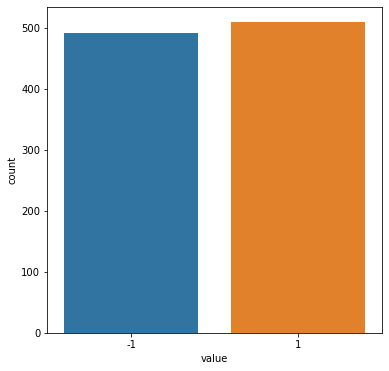

In [9]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = train)

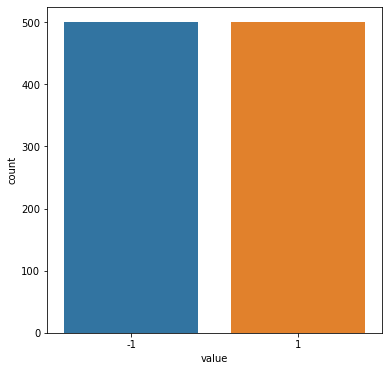

In [10]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = first_test)

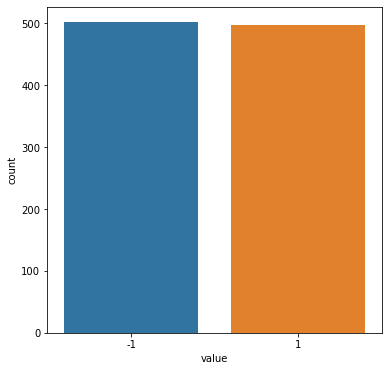

In [11]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = second_test)

## Adaline Algorithm:

In [106]:
def weight_genarate():
    weight = []
    for i in range(2):
        random.seed(i)
        rand = random.uniform(0, 0.1)
        weight.append(rand)
        
    random.seed(4)
    bias = random.uniform(0, 0.1)
    return weight, bias

In [107]:
# activate 
def activate(x, y, bias, weight):
    return (bias + x*weight[0] + y*weight[1]) 

In [114]:
# error calculation:    
def error_calc(predicted, expected):
    error = (expected - predicted) ** 2
    return error

In [119]:
def adaline_algo(learning_rate, train):
    EPS = 0.005
    weight, bias = weight_genarate()
    
    for index, row in train.iterrows():
        predicted = activate(row['x'], row['y'], bias, weight)
        
        # update:
        weight[0] = (weight[0] + learning_rate*(row['value'] - predicted)*row['x'])
        weight[1] = (weight[1] + learning_rate*(row['value'] - predicted)*row['y'])
        bias = bias + learning_rate * (row['value'] - predicted)
        
        # error calc
        error = error_calc(predicted, row['value'])
        print(error)
        if error <= EPS or error == 0:
            break
        
    return weight, bias

In [121]:
# adaline_algo(0.001, train)